In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
processed = pd.read_csv('../input/USBP_BLW_Processed_Subjects_w_an_I44_010112-_093017_-_Modified.csv.gz',
                        compression='gzip', header=6)
deportable = pd.read_csv('../input/USBP_BLW_SPW_Sectors_Principal_APPs_w_I44_Events_010112-063019_-_Modified.csv.gz',
                         compression='gzip', header=6)

In [3]:
deportable.drop(125, inplace=True)
deportable.dropna(how='all', axis=1, inplace=True)
deportable.dropna(how='all', axis=0, inplace=True)

In [4]:
processed.tail()

,CY,GENDER,APPREHENSION_AGE,STATUS_AT_ENTRY,ARREST_METHOD,DEPORTABLE,STATUS_WHEN_FOUND,TIME_IN_US,DISPOSITION,METHOD OF ENTRY,CITIZENSHIP
1209,2017,Male,32.0,Other,Other Agency (turned over to INS),N,NaN,Not Applicable,NIC,NaN,UNITED STATES
1210,2017,Male,33.0,PWA Canada,Patrol Border,Y,IN TRAVEL,at entry,ER/CF,PWA (AFOOT),INDIA
1211,2017,Male,35.0,PWA Other,Other Agency (turned over to INS),N,NaN,Not Applicable,REL,PWA (AFOOT),UNITED STATES
1212,2017,Unknown,NaN,Other,Other Agency (turned over to INS),N,NaN,Not Applicable,NIC,NaN,UNKNOWN
1213,2017,Male,36.0,Other,Patrol Border,N,NaN,Not Applicable,REL,NaN,UNITED STATES


In [5]:
deportable.head()

,APPR_DT_TIME,SECTOR,APP_AGE,GENDER,COMPLEXION,HAIR_COLOR,EYE_COLOR,CITIZENSHIP,STATUS_WHEN_FOUND,CRIM_IND
0,2/1/2012 8:17:00 PM,BLW,18.0,Male,NaN,BLK,BRO,MEXICO,IN INSTITUTION,N
1,2/26/2012 3:00:00 AM,BLW,30.0,Male,NaN,BLK,BRO,MEXICO,NaN,N
2,2/26/2012 7:02:00 PM,BLW,45.0,Male,MED,BLK,BRO,GUATEMALA,AGRICULTURE,N
3,3/18/2012 8:30:00 PM,BLW,33.0,Male,MED,BLK,BRO,EL SALVADOR,IN TRAVEL,N
4,3/29/2012 4:59:00 AM,BLW,19.0,Male,MED,BRO,BRO,MEXICO,IN TRAVEL,N


In [6]:
deportable['APPR_DT_TIME'] = pd.to_datetime(deportable['APPR_DT_TIME'])

In [7]:
deportable.set_index('APPR_DT_TIME', inplace=True)

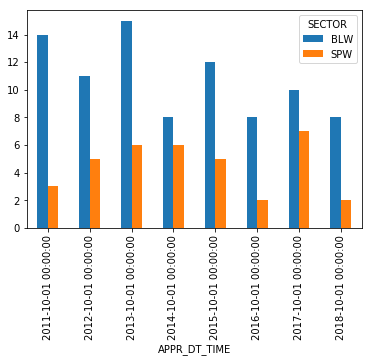

In [8]:
deportable.resample('AS-OCT')['SECTOR'].value_counts().unstack().plot(kind='bar')

In [53]:
deportable.resample('AS-OCT')['CITIZENSHIP'].value_counts()

APPR_DT_TIME  CITIZENSHIP               
2011-10-01    MEXICO                        11
              CANADA                         2
              CHINA, PEOPLES REPUBLIC OF     1
              CUBA                           1
              EL SALVADOR                    1
              GUATEMALA                      1
2012-10-01    MEXICO                         8
              ALBANIA                        1
              BURMA                          1
              CAMBODIA                       1
              HONDURAS                       1
              INDIA                          1
              MAURITIUS                      1
              PERU                           1
              SOMALIA                        1
2013-10-01    MEXICO                         8
              CANADA                         3
              CHINA, PEOPLES REPUBLIC OF     3
              EL SALVADOR                    2
              GUATEMALA                      2
              ETHIO

In [57]:
deportable.resample('AS-OCT')['STATUS_WHEN_FOUND'].value_counts().unstack()

STATUS_WHEN_FOUND,AGRICULTURE,CONSTRUCTION,IN INSTITUTION,IN TRAVEL,SEEKING EMPLOYMENT,TRAVEL/SEEKING
APPR_DT_TIME,,,,,,
2011-10-01,1.0,NaN,2.0,4.0,NaN,7.0
2012-10-01,NaN,NaN,NaN,9.0,1.0,2.0
2013-10-01,1.0,NaN,2.0,8.0,1.0,5.0
2014-10-01,1.0,NaN,1.0,6.0,NaN,3.0
2015-10-01,NaN,NaN,NaN,10.0,NaN,4.0
2016-10-01,NaN,NaN,NaN,4.0,1.0,3.0
2017-10-01,NaN,1.0,1.0,9.0,NaN,4.0
2018-10-01,NaN,NaN,NaN,6.0,NaN,2.0


In [66]:
deportable.groupby(['SECTOR'])['STATUS_WHEN_FOUND'].value_counts()

SECTOR  STATUS_WHEN_FOUND 
BLW     IN TRAVEL             43
        TRAVEL/SEEKING        22
        IN INSTITUTION         3
        AGRICULTURE            2
SPW     IN TRAVEL             13
        TRAVEL/SEEKING         8
        IN INSTITUTION         3
        SEEKING EMPLOYMENT     3
        AGRICULTURE            1
        CONSTRUCTION           1
Name: STATUS_WHEN_FOUND, dtype: int64